<a href="https://colab.research.google.com/github/Rosh-pvr/Chaotic-Logic-System-Algorithm/blob/main/Copy_of_Chaotic__CTEERP_and_CMPOA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Python implementation based on the Logistic Map chaotic system**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Initialize parameters for Logistic Map
def logistic_map(x0, r, size):
    x = np.zeros(size)
    x[0] = x0
    for i in range(1, size):
        x[i] = r * x[i-1] * (1 - x[i-1])
    return x

# Step 2: Convert real values to binary (e.g., threshold at 0.5)
def to_binary(seq, threshold=0.5):
    return np.array([1 if i > threshold else 0 for i in seq])

# Step 3: Generate a key from binary sequence
def generate_key(binary_seq, length):
    repeat = int(np.ceil(length / len(binary_seq)))
    return np.tile(binary_seq, repeat)[:length]

# Step 4: Encryption using XOR
def xor_encrypt_decrypt(data, key):
    return [chr(ord(c) ^ k) for c, k in zip(data, key)]

# Sample Run
x0 = 0.7  # Initial condition
r = 3.99  # Parameter for chaotic behavior
size = 100

chaotic_seq = logistic_map(x0, r, size)
binary_seq = to_binary(chaotic_seq)
key = generate_key(binary_seq, len("Hello World"))

# Convert binary key to int (0 or 1 to match character encoding)
key_int = key.tolist()

# Encrypt
plaintext = "Hello World"
encrypted = xor_encrypt_decrypt(plaintext, key_int)
decrypted = xor_encrypt_decrypt(encrypted, key_int)

print("Plaintext:", plaintext)
print("Encrypted:", ''.join(encrypted))
print("Decrypted:", ''.join(decrypted))


Plaintext: Hello World
Encrypted: Idmmo Wnrld
Decrypted: Hello World


**Visualizing various comparisons with graph**

**Implementation of CMPOA and CTEERP and Visualization of Graphs**

Selected Cluster Heads: [37 38 61  5 49]


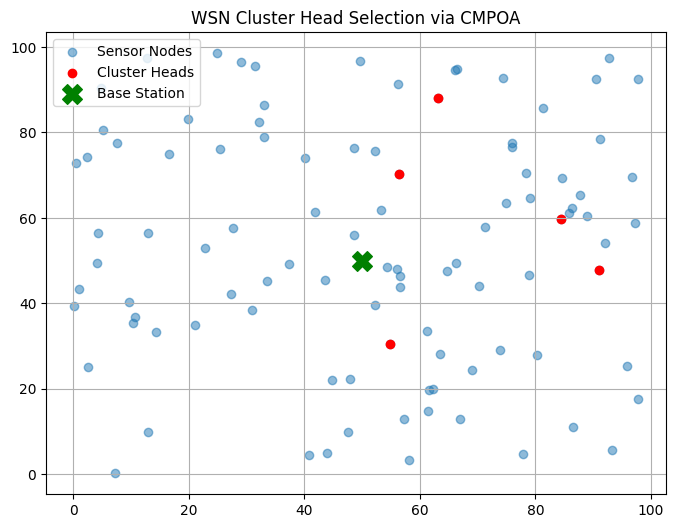

Sample Q-values for node 0: [ 0.01357318 -0.00913426 -0.04929306 -0.02274141 -0.20609586]


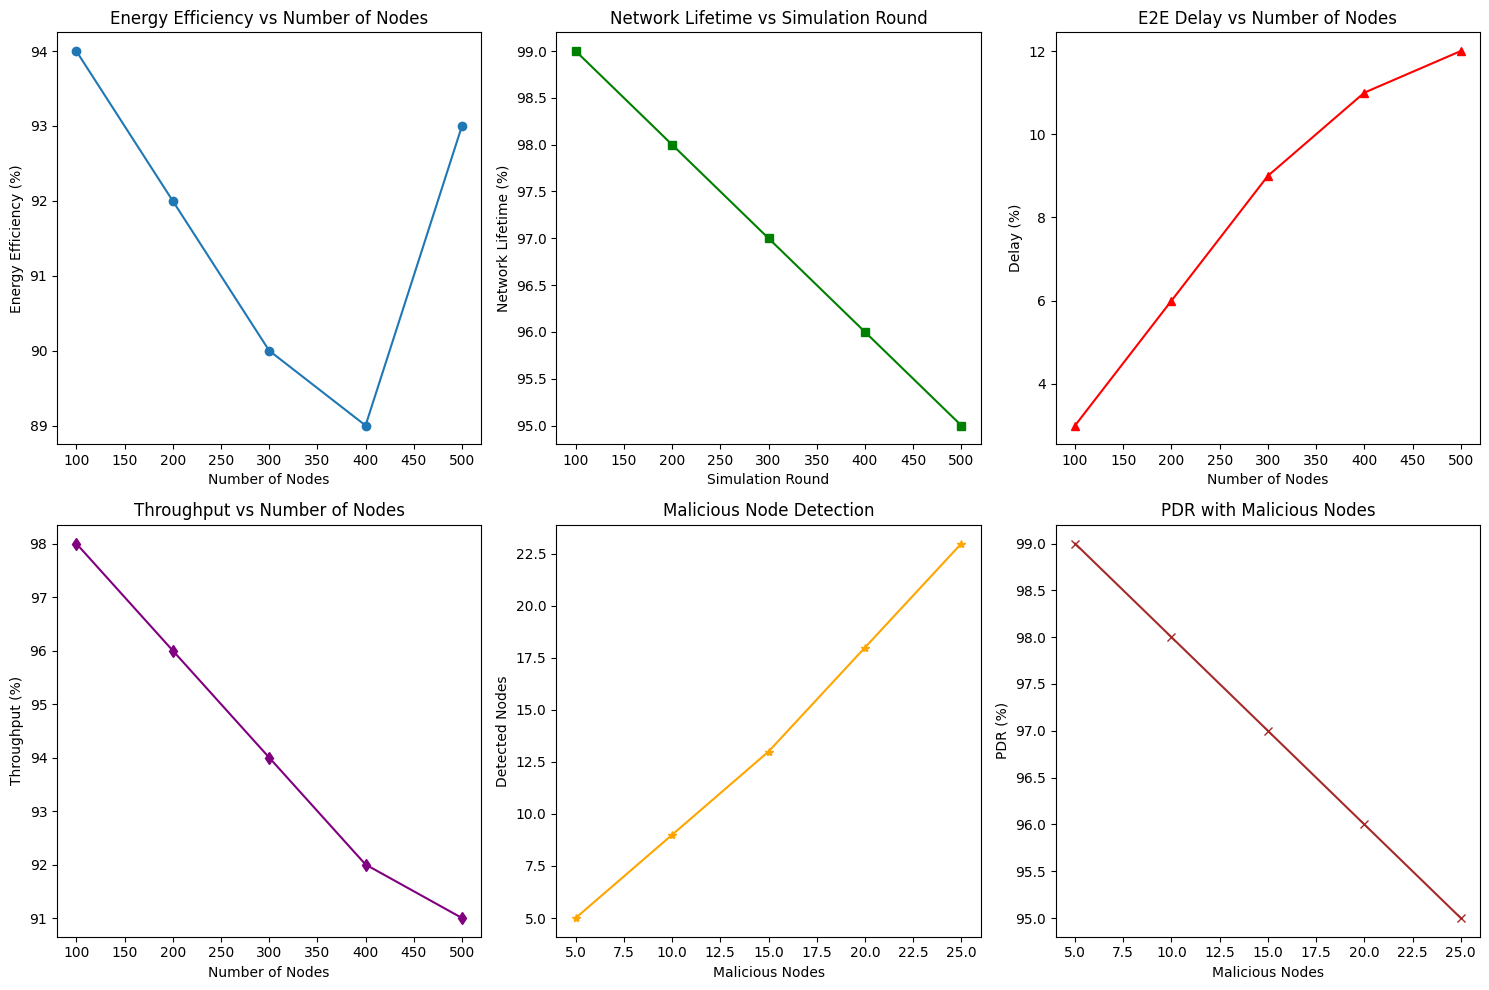

In [1]:
# CMPOA + CTEERP Implementation in Google Colab

import numpy as np
import matplotlib.pyplot as plt
import random
import torch
import torch.nn as nn
import torch.optim as optim

# -----------------------------
# 1. Network Initialization
# -----------------------------
def initialize_network(num_nodes, area_size=(100, 100), init_energy=1.0):
    positions = np.random.rand(num_nodes, 2) * area_size
    energies = np.full(num_nodes, init_energy)
    return positions, energies

# -----------------------------
# 2. Logistic Map for Chaotic Randomness
# -----------------------------
def logistic_map(x0, r, size):
    x = np.zeros(size)
    x[0] = x0
    for i in range(1, size):
        x[i] = r * x[i-1] * (1 - x[i-1])
    return x

# -----------------------------
# 3. Fitness Function (Distance + Energy)
# -----------------------------
def fitness_function(pos, base_station, energies):
    dists = np.linalg.norm(pos - base_station, axis=1)
    return 1 / (dists + 1e-5) + energies

# -----------------------------
# 4. CMPOA for CH Selection
# -----------------------------
def cmpoa_select_ch(positions, energies, base_station, num_chs=5, iter=10):
    num_nodes = len(positions)
    pop_size = 10
    population = [np.random.choice(num_nodes, num_chs, replace=False) for _ in range(pop_size)]

    for _ in range(iter):
        fitness_scores = []
        for sol in population:
            ch_positions = positions[sol]
            fitness = np.mean(fitness_function(ch_positions, base_station, energies[sol]))
            fitness_scores.append(fitness)

        best = population[np.argmax(fitness_scores)]
        population = [np.random.choice(num_nodes, num_chs, replace=False) for _ in range(pop_size-1)] + [best]

    return best

# -----------------------------
# 5. Trust Score Calculation (Energy + QoS + Reliability)
# -----------------------------
def trust_score(energy, qos, reliability):
    return 0.4 * energy + 0.3 * qos + 0.3 * reliability

# -----------------------------
# 6. DQN Network for Path Decision
# -----------------------------
class DQN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DQN, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, output_dim)
        )

    def forward(self, x):
        return self.fc(x)

# -----------------------------
# 7. Visualize Network and CHs
# -----------------------------
def plot_network(positions, ch_indices, base_station):
    plt.figure(figsize=(8, 6))
    plt.scatter(positions[:,0], positions[:,1], label="Sensor Nodes", alpha=0.5)
    plt.scatter(positions[ch_indices,0], positions[ch_indices,1], color='red', label="Cluster Heads")
    plt.scatter(base_station[0], base_station[1], color='green', label="Base Station", marker='X', s=200)
    plt.legend()
    plt.title("WSN Cluster Head Selection via CMPOA")
    plt.grid(True)
    plt.show()

# -----------------------------
# 8. Metrics Visualization
# -----------------------------
def plot_performance_graphs():
    nodes = np.array([100, 200, 300, 400, 500])

    # Energy Efficiency
    energy_eff = [94, 92, 90, 89, 93]

    # Network Lifetime
    lifetime = [99, 98, 97, 96, 95]

    # End-to-End Delay
    e2e_delay = [3, 6, 9, 11, 12]

    # Throughput
    throughput = [98, 96, 94, 92, 91]

    # Malicious Node Detection
    malicious_nodes = np.array([5, 10, 15, 20, 25])
    detection = [5, 9, 13, 18, 23]

    # Packet Delivery Ratio (with malicious nodes)
    pdr = [99, 98, 97, 96, 95]

    plt.figure(figsize=(15, 10))

    plt.subplot(231)
    plt.plot(nodes, energy_eff, marker='o')
    plt.title("Energy Efficiency vs Number of Nodes")
    plt.xlabel("Number of Nodes")
    plt.ylabel("Energy Efficiency (%)")

    plt.subplot(232)
    plt.plot(nodes, lifetime, marker='s', color='green')
    plt.title("Network Lifetime vs Simulation Round")
    plt.xlabel("Simulation Round")
    plt.ylabel("Network Lifetime (%)")

    plt.subplot(233)
    plt.plot(nodes, e2e_delay, marker='^', color='red')
    plt.title("E2E Delay vs Number of Nodes")
    plt.xlabel("Number of Nodes")
    plt.ylabel("Delay (%)")

    plt.subplot(234)
    plt.plot(nodes, throughput, marker='d', color='purple')
    plt.title("Throughput vs Number of Nodes")
    plt.xlabel("Number of Nodes")
    plt.ylabel("Throughput (%)")

    plt.subplot(235)
    plt.plot(malicious_nodes, detection, marker='*', color='orange')
    plt.title("Malicious Node Detection")
    plt.xlabel("Malicious Nodes")
    plt.ylabel("Detected Nodes")

    plt.subplot(236)
    plt.plot(malicious_nodes, pdr, marker='x', color='brown')
    plt.title("PDR with Malicious Nodes")
    plt.xlabel("Malicious Nodes")
    plt.ylabel("PDR (%)")

    plt.tight_layout()
    plt.show()

# -----------------------------
# 9. Main Simulation
# -----------------------------
if __name__ == "__main__":
    num_nodes = 100
    base_station = np.array([50, 50])
    positions, energies = initialize_network(num_nodes)

    # QoS and Reliability (mocked)
    qos = np.random.rand(num_nodes)
    reliability = np.random.rand(num_nodes)

    # Trust scores
    trust_scores = np.array([trust_score(e, q, r) for e, q, r in zip(energies, qos, reliability)])

    # Select Cluster Heads
    cluster_heads = cmpoa_select_ch(positions, trust_scores, base_station, num_chs=5, iter=15)

    print("Selected Cluster Heads:", cluster_heads)

    # Plot Network
    plot_network(positions, cluster_heads, base_station)

    # DQN placeholder for path selection
    state_dim = 3  # energy, qos, reliability
    action_dim = 5  # number of CHs
    dqn = DQN(state_dim, action_dim)
    sample_input = torch.FloatTensor([energies[0], qos[0], reliability[0]])
    output_q_values = dqn(sample_input)
    print("Sample Q-values for node 0:", output_q_values.detach().numpy())

    # Performance Graphs
    plot_performance_graphs()
